### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [23]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Student_performance_data _.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student:

- If GPA values between 0 and 2 will be labeled 'Low',
- Values between 2 and 3.5 will be 'Medium',
- And values between 3.5 and 5 will be 'High'.


In [25]:
data['Profile'] = pd.cut(data['GPA'], bins=[0, 2, 3.5, 5], labels=['Low', 'Medium', 'High'], right=False)


In [26]:
data[data['Profile'] == 'High']

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0,High
44,1045,18,1,0,1,18.921512,1,1,3,1,1,0,0,4.000000,0.0,High
91,1092,18,1,0,2,7.724728,0,0,2,1,1,0,0,3.506920,0.0,High
92,1093,16,0,0,2,9.697175,1,1,3,0,0,0,0,3.552287,0.0,High
111,1112,17,1,3,0,5.670144,2,1,4,0,0,1,0,3.545159,0.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,3296,18,0,0,2,13.797920,2,1,3,0,0,0,0,3.597766,2.0,High
2319,3320,17,0,0,2,9.285447,0,0,4,1,0,1,1,4.000000,3.0,High
2326,3327,16,1,0,2,11.136888,4,0,4,1,1,0,0,3.546433,1.0,High
2338,3339,18,1,0,2,12.475444,1,1,2,1,0,1,0,3.572945,1.0,High


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

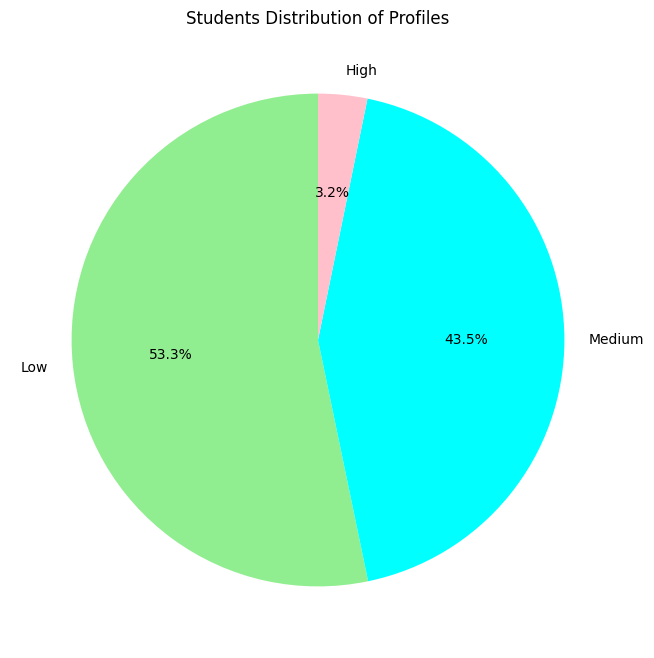

In [27]:
profile_counts = data['Profile'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','cyan','pink'])
plt.title('Students Distribution of Profiles')
plt.show()


### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [28]:
data['Profile'] = data['Profile'].map({'Low': 0, 'Medium': 1, 'High': 2})

### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [29]:
X = data.drop(columns = ['Profile'])
y = data['Profile']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

(1913, 15)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [30]:
 # Already done before

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [31]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1], ), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [32]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [33]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_split = 0.2)

Epoch 1/50
153/153 [==============================] - 1s 3ms/step - loss: 0.5272 - accuracy: 0.8092 - val_loss: 0.2620 - val_accuracy: 0.9243
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9412 - val_loss: 0.1658 - val_accuracy: 0.9399
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.9614 - val_loss: 0.1169 - val_accuracy: 0.9556
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9699 - val_loss: 0.1026 - val_accuracy: 0.9634
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9804 - val_loss: 0.0833 - val_accuracy: 0.9791
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9850 - val_loss: 0.0679 - val_accuracy: 0.9843
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9908 - val_loss: 0.0575 - val_accuracy: 0.9791
Epoch 

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

In [34]:
X_epochs = np.arange(1,51)
y_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

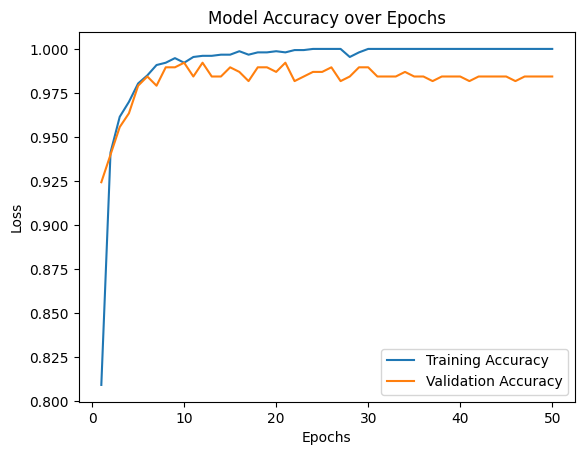

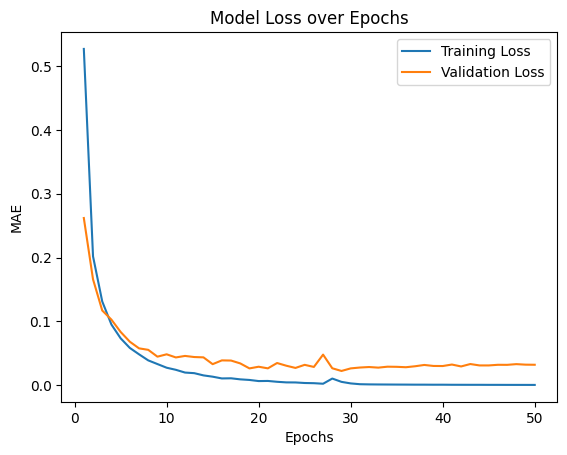

In [35]:
# Your code here
plt.plot(X_epochs, y_acc, label = 'Training Accuracy')
plt.plot(X_epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


plt.plot(X_epochs, loss_train, label = 'Training Loss')
plt.plot(X_epochs, loss_val, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [36]:
results = model.evaluate(X_test, y_test, batch_size= 32)
results

15/15 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9770


[0.10661732405424118, 0.9770354628562927]

In [37]:
history_1_loss = history.history['loss'][-1]
history_1_acc = history.history['accuracy'][-1]

As we can see, the loss function is low, which means the model is working adequately.

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [38]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
label_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
scc = SparseCategoricalCrossentropy()

y_pred = model.predict(X_test)
arg_max = y_pred.argmax(axis=-1)
for pred, actual in zip(y_pred, y_test):
    arg_max = pred.argmax(axis=-1)
    print(f"Predicted values: {pred}, Actual value: {label_mapping[actual]},           Label with the highest prob: {label_mapping[arg_max]}")
scc_entropy = scc(y_test, y_pred)
print(f"Sparse Categorical Cross-Entropy: {scc_entropy}")

15/15 [==============================] - 0s 1ms/step
Predicted values: [9.9999994e-01 1.6681660e-14 5.2613377e-22], Actual value: Low,           Label with the highest prob: Low
Predicted values: [9.2919575e-14 9.9999994e-01 7.2404851e-12], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [5.3296417e-02 9.4670355e-01 1.1018268e-08], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [2.5739222e-13 1.1522130e-04 9.9988467e-01], Actual value: High,           Label with the highest prob: High
Predicted values: [9.9999994e-01 1.5981014e-27 1.2456640e-31], Actual value: Low,           Label with the highest prob: Low
Predicted values: [1.5952503e-09 9.9999994e-01 2.8728557e-09], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [5.608860e-05 9.999438e-01 3.430733e-11], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [7.5202697e-04 9.9924803e-01 2.

As we can see, the model assigned the highest probs to the correct labels most of the times and our loss function was very small, which means our model works perfectly fine.

#### Prediction of the first 5 students

In [39]:
y_1 = model.predict(X_test[:5])
y_1

1/1 [==============================] - 0s 24ms/step


array([[1.0000000e+00, 1.6681662e-14, 5.2613382e-22],
       [9.2919582e-14, 1.0000000e+00, 7.2404856e-12],
       [5.3296417e-02, 9.4670361e-01, 1.1018270e-08],
       [2.5739222e-13, 1.1522131e-04, 9.9988472e-01],
       [1.0000000e+00, 1.5981015e-27, 1.2456641e-31]], dtype=float32)

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
    * Used MinMaxScaler instead of Standard.
    * Dropped Gender, Ethnicity and StudentID columns

   - Model Definition
    * Changed the architecture : the first layer is the input layer which receives 64 units with relu activation, the second layer is a dropout layer with a dropout of 0.3, the third layer adds 32 units with relu activation, the fourth layer is a dropout layer with a dropout of 0.15, the fifth layer adds 16 units with relu activation, the sixth layer is a dropout layer with a dropout of 0.05 and the final layer is a 3-unit layer with softmax activation.
   - Model Compile
    * Nothing changed.
   - Model Training
    * Increased the number of epochs to 100 and adjusted the batch size to 32

Epoch 1/100
48/48 [==============================] - 1s 6ms/step - loss: 0.8732 - accuracy: 0.5503 - val_loss: 0.6855 - val_accuracy: 0.7102
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.7392 - val_loss: 0.3722 - val_accuracy: 0.9086
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8529 - val_loss: 0.2661 - val_accuracy: 0.8903
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8915 - val_loss: 0.2019 - val_accuracy: 0.9399
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.8987 - val_loss: 0.1840 - val_accuracy: 0.9426
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2369 - accuracy: 0.9150 - val_loss: 0.1661 - val_accuracy: 0.9373
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9170 - val_loss: 0.1610 - val_accuracy: 0.9399
Epoch 8/100
4

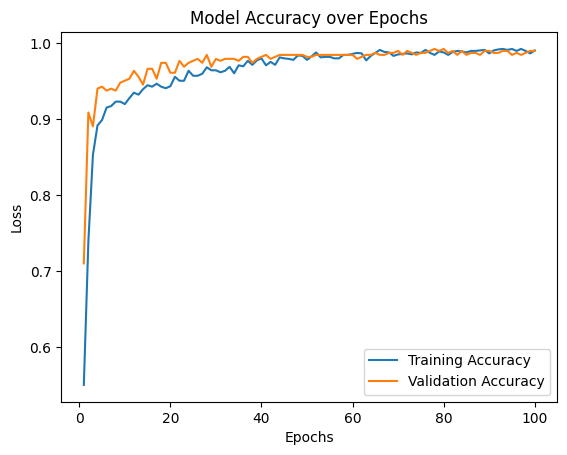

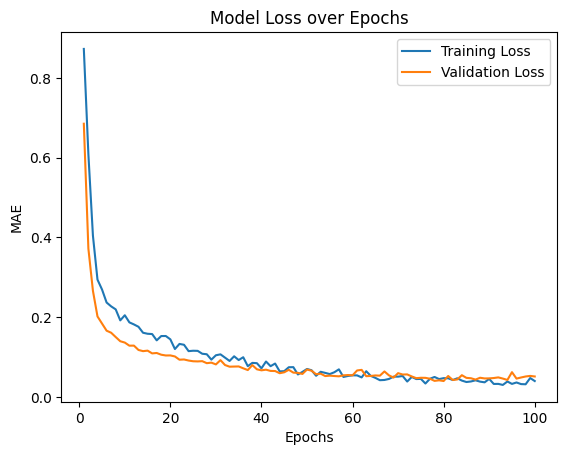

15/15 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9854
Results:
 [0.05714891850948334, 0.9853861927986145]
15/15 [==============================] - 0s 1ms/step
Predicted values: [9.9999875e-01 1.1467380e-06 2.6898659e-11], Actual value: Low,           Label with the highest prob: Low
Predicted values: [1.7258561e-05 9.9578303e-01 4.1997540e-03], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [5.9656939e-03 9.9360371e-01 4.3052837e-04], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [1.2182856e-07 6.7435234e-04 9.9932545e-01], Actual value: High,           Label with the highest prob: High
Predicted values: [9.9999994e-01 1.1622471e-13 6.9352438e-20], Actual value: Low,           Label with the highest prob: Low
Predicted values: [2.4940021e-04 9.9846190e-01 1.2886347e-03], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [2.4282350e-01 7.569

In [40]:
# Your code here
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])

# Data preparation

X = dataset.drop(columns = 'Profile')
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = dataset['Profile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

# NN architecture
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X_train.shape[1], ), activation = 'relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dropout(0.15))
model_2.add(Dense(16, activation = 'relu'))
model_2.add(Dropout(0.05))
model_2.add(Dense(3, activation = 'softmax'))


# Model compilation

model_2.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model

history_2 = model_2.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2)

# Plotting the results
X_epochs = np.arange(1, 101)
y_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']

plt.plot(X_epochs, y_acc, label = 'Training Accuracy')
plt.plot(X_epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


plt.plot(X_epochs, loss_train, label = 'Training Loss')
plt.plot(X_epochs, loss_val, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()
# Model Evaluation

results = model_2.evaluate(X_test, y_test, batch_size= 32)
print('Results:\n',results)


# Predictions
y_pred_2 = model_2.predict(X_test)
for pred, actual in zip(y_pred_2, y_test):
    arg_max = pred.argmax(axis=-1)
    print(f"Predicted values: {pred}, Actual value: {label_mapping[actual]},           Label with the highest prob: {label_mapping[arg_max]}")
scc_entropy = scc(y_test, y_pred)
print(f"Sparse Categorical Cross-Entropy: {scc_entropy}")

#### Prediction of the first 5 students

In [41]:
y_2 = model_2.predict(X_test[:5])
y_2

1/1 [==============================] - 0s 23ms/step


array([[9.9999881e-01, 1.1467381e-06, 2.6898660e-11],
       [1.7258562e-05, 9.9578309e-01, 4.1997540e-03],
       [5.9656943e-03, 9.9360377e-01, 4.3052837e-04],
       [1.2182858e-07, 6.7435240e-04, 9.9932551e-01],
       [1.0000000e+00, 1.1622472e-13, 6.9352445e-20]], dtype=float32)

#### Model 3:
- Changes:
   - Dataset Data Engineering
    * Used MinMaxScaler instead of Standard.
    * Dropped the Gender, Ethnicity and StudentID columns.

   - Model Definition
    * Changed the architecture : first of all, we start with the input layer, which receives data with 64 units, followed by Batch Normalization, a Leaky ReLU activation with $ \alpha = 0.1 $ , and a Dropout layer of 0.3. Then, we add a 32-unit hidden layer, followed by Batch Normalization, another Leaky ReLU activation and a Dropout layer of 0.25. Next, we add a hidden layer of 16 units with a Leaky ReLU activation and a Dropout layer of 0.2. Then we added an additional layer with 8 units, a ReLU activation and a Dropout layer of 0.1. Finally, we then added the output layer of 3 units with softmax activation.
   - Model Compile
    * Nothing changed.
   - Model Training
    * Increased the number of epochs to 200 and adjusted the batch size to 16

Epoch 1/200
96/96 [==============================] - 2s 5ms/step - loss: 0.8897 - accuracy: 0.6183 - val_loss: 0.7658 - val_accuracy: 0.8407
Epoch 2/200
96/96 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7954 - val_loss: 0.4166 - val_accuracy: 0.9086
Epoch 3/200
96/96 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8542 - val_loss: 0.3088 - val_accuracy: 0.9373
Epoch 4/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.8712 - val_loss: 0.2716 - val_accuracy: 0.9373
Epoch 5/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8948 - val_loss: 0.2367 - val_accuracy: 0.9426
Epoch 6/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8771 - val_loss: 0.2172 - val_accuracy: 0.9478
Epoch 7/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8974 - val_loss: 0.2069 - val_accuracy: 0.9452
Epoch 8/200
9

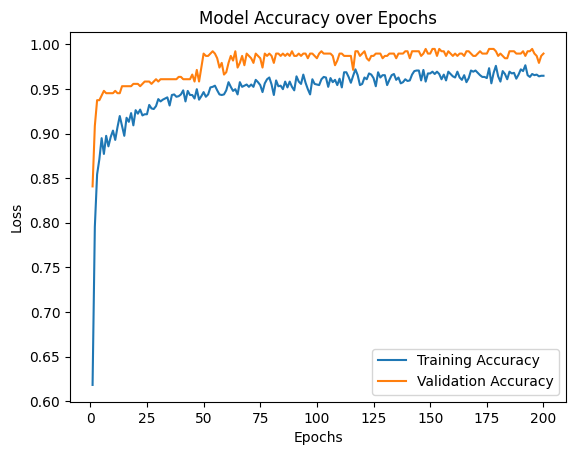

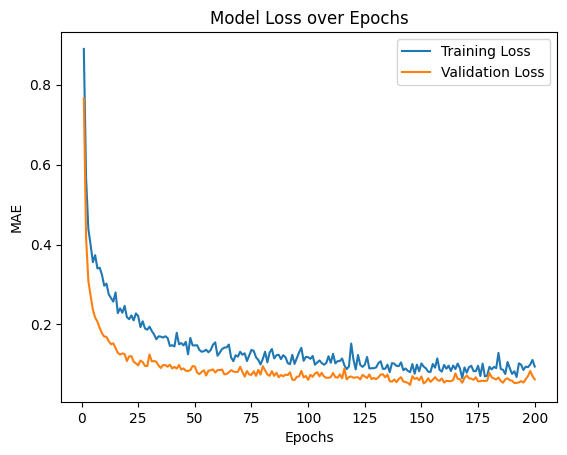

15/15 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9875
Results:
 [0.06983242928981781, 0.9874739050865173]
15/15 [==============================] - 0s 1ms/step
Predicted values: [9.9464273e-01 5.3572482e-03 1.1240631e-16], Actual value: Low,           Label with the highest prob: Low
Predicted values: [1.04671555e-04 9.69383121e-01 3.05120852e-02], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [0.11845042 0.87946594 0.00208365], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [1.9981703e-06 3.4427261e-01 6.5572530e-01], Actual value: High,           Label with the highest prob: High
Predicted values: [9.9999994e-01 2.9765987e-09 0.0000000e+00], Actual value: Low,           Label with the highest prob: Low
Predicted values: [0.00126    0.99550337 0.00323674], Actual value: Medium,           Label with the highest prob: Medium
Predicted values: [8.3594881e-03 9.9110800e-01 5.3243

In [42]:
dataset = data.drop(columns = ['Gender', 'Ethnicity', 'StudentID'])
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
# Data preparation

X = dataset.drop(columns = 'Profile')
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = dataset['Profile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

# NN architecture
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X_train.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.3))

model_3.add(Dense(32))
model_3.add(BatchNormalization())
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.25))

model_3.add(Dense(16))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dropout(0.2))

model_3.add(Dense(8, activation='relu'))
model_3.add(Dropout(0.1))

model_3.add(Dense(3, activation='softmax'))

# Model compilation

model_3.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the model

history_3 = model_3.fit(X_train, y_train, batch_size = 16, epochs = 200, validation_split = 0.2)

# Plotting the results
X_epochs = np.arange(1, 201)
y_acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']
plt.plot(X_epochs, y_acc, label = 'Training Accuracy')
plt.plot(X_epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


plt.plot(X_epochs, loss_train, label = 'Training Loss')
plt.plot(X_epochs, loss_val, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model Loss over Epochs')
plt.show()

# Model Evaluation

results = model_3.evaluate(X_test, y_test, batch_size= 32)
print('Results:\n',results)

# Predictions
y_pred_3 = model_3.predict(X_test)
for pred, actual in zip(y_pred_3, y_test):
    arg_max = pred.argmax(axis=-1)
    print(f"Predicted values: {pred}, Actual value: {label_mapping[actual]},           Label with the highest prob: {label_mapping[arg_max]}")

scc_entropy = scc(y_test, y_pred_3)
print(f"Sparse Categorical Cross-Entropy: {scc_entropy}")


#### Prediction of the first 5 students

In [43]:
y_3 = model_3.predict(X_test[:5])
y_3

1/1 [==============================] - 0s 23ms/step


array([[9.94642735e-01, 5.35724824e-03, 1.12406315e-16],
       [1.04671562e-04, 9.69383180e-01, 3.05120870e-02],
       [1.18450426e-01, 8.79465997e-01, 2.08364823e-03],
       [1.99817032e-06, 3.44272643e-01, 6.55725360e-01],
       [1.00000000e+00, 2.97659919e-09, 0.00000000e+00]], dtype=float32)

# Comparing the models

In [44]:
data = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Loss": [history_1_loss, history_2.history['loss'][-1], history_3.history['loss'][-1]],
    "Accuracy": [history_1_acc, history_2.history['accuracy'][-1], history_3.history['accuracy'][-1]]
}

df = pd.DataFrame(data)
df

,Model,Loss,Accuracy
0,Model 1,0.000172,1.000000
1,Model 2,0.039810,0.990196
2,Model 3,0.094539,0.964706


In [50]:
prob_1 = y_1.argmax(axis =-1)
prob_2 =  y_2.argmax(axis = -1)
prob_3 = y_3.argmax(axis = -1)

In [52]:
data = {
    "Student": ["1", "2", "3", "4", "5"],
    "Model 1": [prob_1[0], prob_1[1], prob_1[2], prob_1[3], prob_1[4]],
    "Model 2": [prob_2[0], prob_2[1], prob_2[2], prob_2[3], prob_2[4]],
    "Model 3": [prob_3[0], prob_3[1], prob_3[2], prob_3[3], prob_3[4]],
    "Actual value": [y_test.iloc[0], y_test.iloc[1], y_test.iloc[2], y_test.iloc[3], y_test.iloc[4]]
}

df = pd.DataFrame(data)

df

,Student,Model 1,Model 2,Model 3,Actual value
0,1,0,0,0,0
1,2,1,1,1,1
2,3,1,1,1,1
3,4,2,2,2,2
4,5,0,0,0,0


As it is seen in the previous tables, the model which optimized and minimized the loss function is the model 1. It also obtained the Loss function with the lowest value and the highest accuracy.